In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib
from matplotlib import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set column names
#1. Sample code number: id number
#2. Clump Thickness: 1 - 10
#3. Uniformity of Cell Size: 1 - 10
#4. Uniformity of Cell Shape: 1 - 10
#5. Marginal Adhesion: 1 - 10
#6. Single Epithelial Cell Size: 1 - 10
#7. Bare Nuclei: 1 - 10
#8. Bland Chromatin: 1 - 10
#9. Normal Nucleoli: 1 - 10
#10. Mitoses: 1 - 10
#11. Class: (2 for benign, 4 for malignant)
names = ['id','clumpThick','uniCelsize','uniCelshape','mAdhes','singCelsize',\
         'bareNucl','blandChroma','normNucleoli','mitoses','class'] 
# import data
data = pd.read_csv('breast-cancer-wisconsin.data',names=names)

In [3]:
# scan data
data.head()

,id,clumpThick,uniCelsize,uniCelshape,mAdhes,singCelsize,bareNucl,blandChroma,normNucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# data checks any null
data.isnull().sum()

id              0
clumpThick      0
uniCelsize      0
uniCelshape     0
mAdhes          0
singCelsize     0
bareNucl        0
blandChroma     0
normNucleoli    0
mitoses         0
class           0
dtype: int64

In [5]:
# more data checks (this is a problem)
data.applymap(np.isreal).sum()

id              699
clumpThick      699
uniCelsize      699
uniCelshape     699
mAdhes          699
singCelsize     699
bareNucl          0
blandChroma     699
normNucleoli    699
mitoses         699
class           699
dtype: int64

In [6]:
# this we found some ????
badsam = np.where(np.any(np.isnan(data.apply(pd.to_numeric,errors='coerce')), axis=1))
data.loc[badsam]

,id,clumpThick,uniCelsize,uniCelshape,mAdhes,singCelsize,bareNucl,blandChroma,normNucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [7]:
# total bad events are only 16 so 
#lets just remove them and convert the bad row to int
data.drop(badsam[0], inplace=True)
data['bareNucl'] = pd.to_numeric(data['bareNucl'])

In [8]:
# rescale id to other vars and see what that looks like
mmin = min(data['id'])
mmax = max(data['id'])
a = (10.0) / (mmax - mmin)
b =  10.0 -  (a * mmax)
data['id'] = data['id'].apply(lambda x : (a*x)+b)

In [9]:
# let's re-class with 0=ben and 1=mal
def reclass(x):
    if x == 2 : return 0
    else      : return 1
data['class'] = data['class'].apply(reclass)

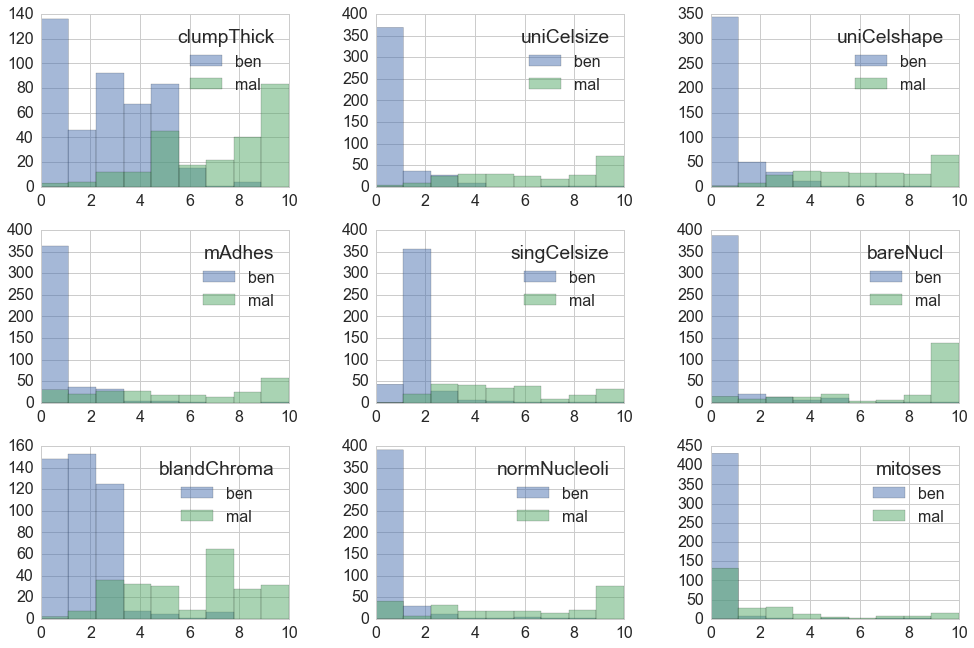

In [10]:
# make a bunch of histograms
sns.set(style = 'whitegrid',font_scale=1.6)

bins = np.linspace(0, 10, 10)
x = data.loc[data['class']==0]
y = data.loc[data['class']==1]

plt.figure(1,figsize=(15,10))
sbnum = 330
for c in names[1:10] :
    sbnum+=1
    plt.subplot( sbnum )
    plt.hist(x[c], bins, alpha=0.5, label='ben')
    plt.hist(y[c], bins, alpha=0.5, label='mal')
    plt.legend(loc='upper right',title=c)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

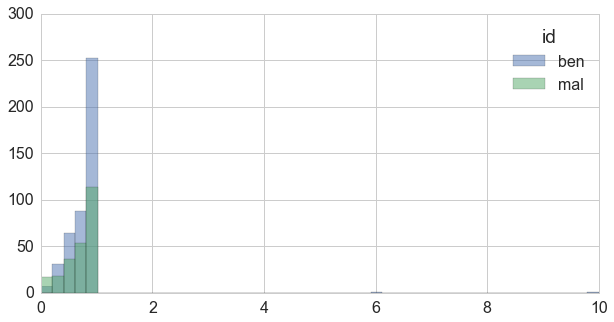

In [11]:
# make id histogram
bins = np.linspace(0, 10, 50)

plt.figure(2,figsize=(10,5))
plt.hist(x['id'], bins, alpha=0.5, label='ben')
plt.hist(y['id'], bins, alpha=0.5, label='mal')
plt.legend(loc='upper right',title='id')
plt.show()

#there are a few outliers but most of the distrobution is below 1.0

In [12]:
# are there correlations
from scipy import stats
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = matplotlib.pyplot.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

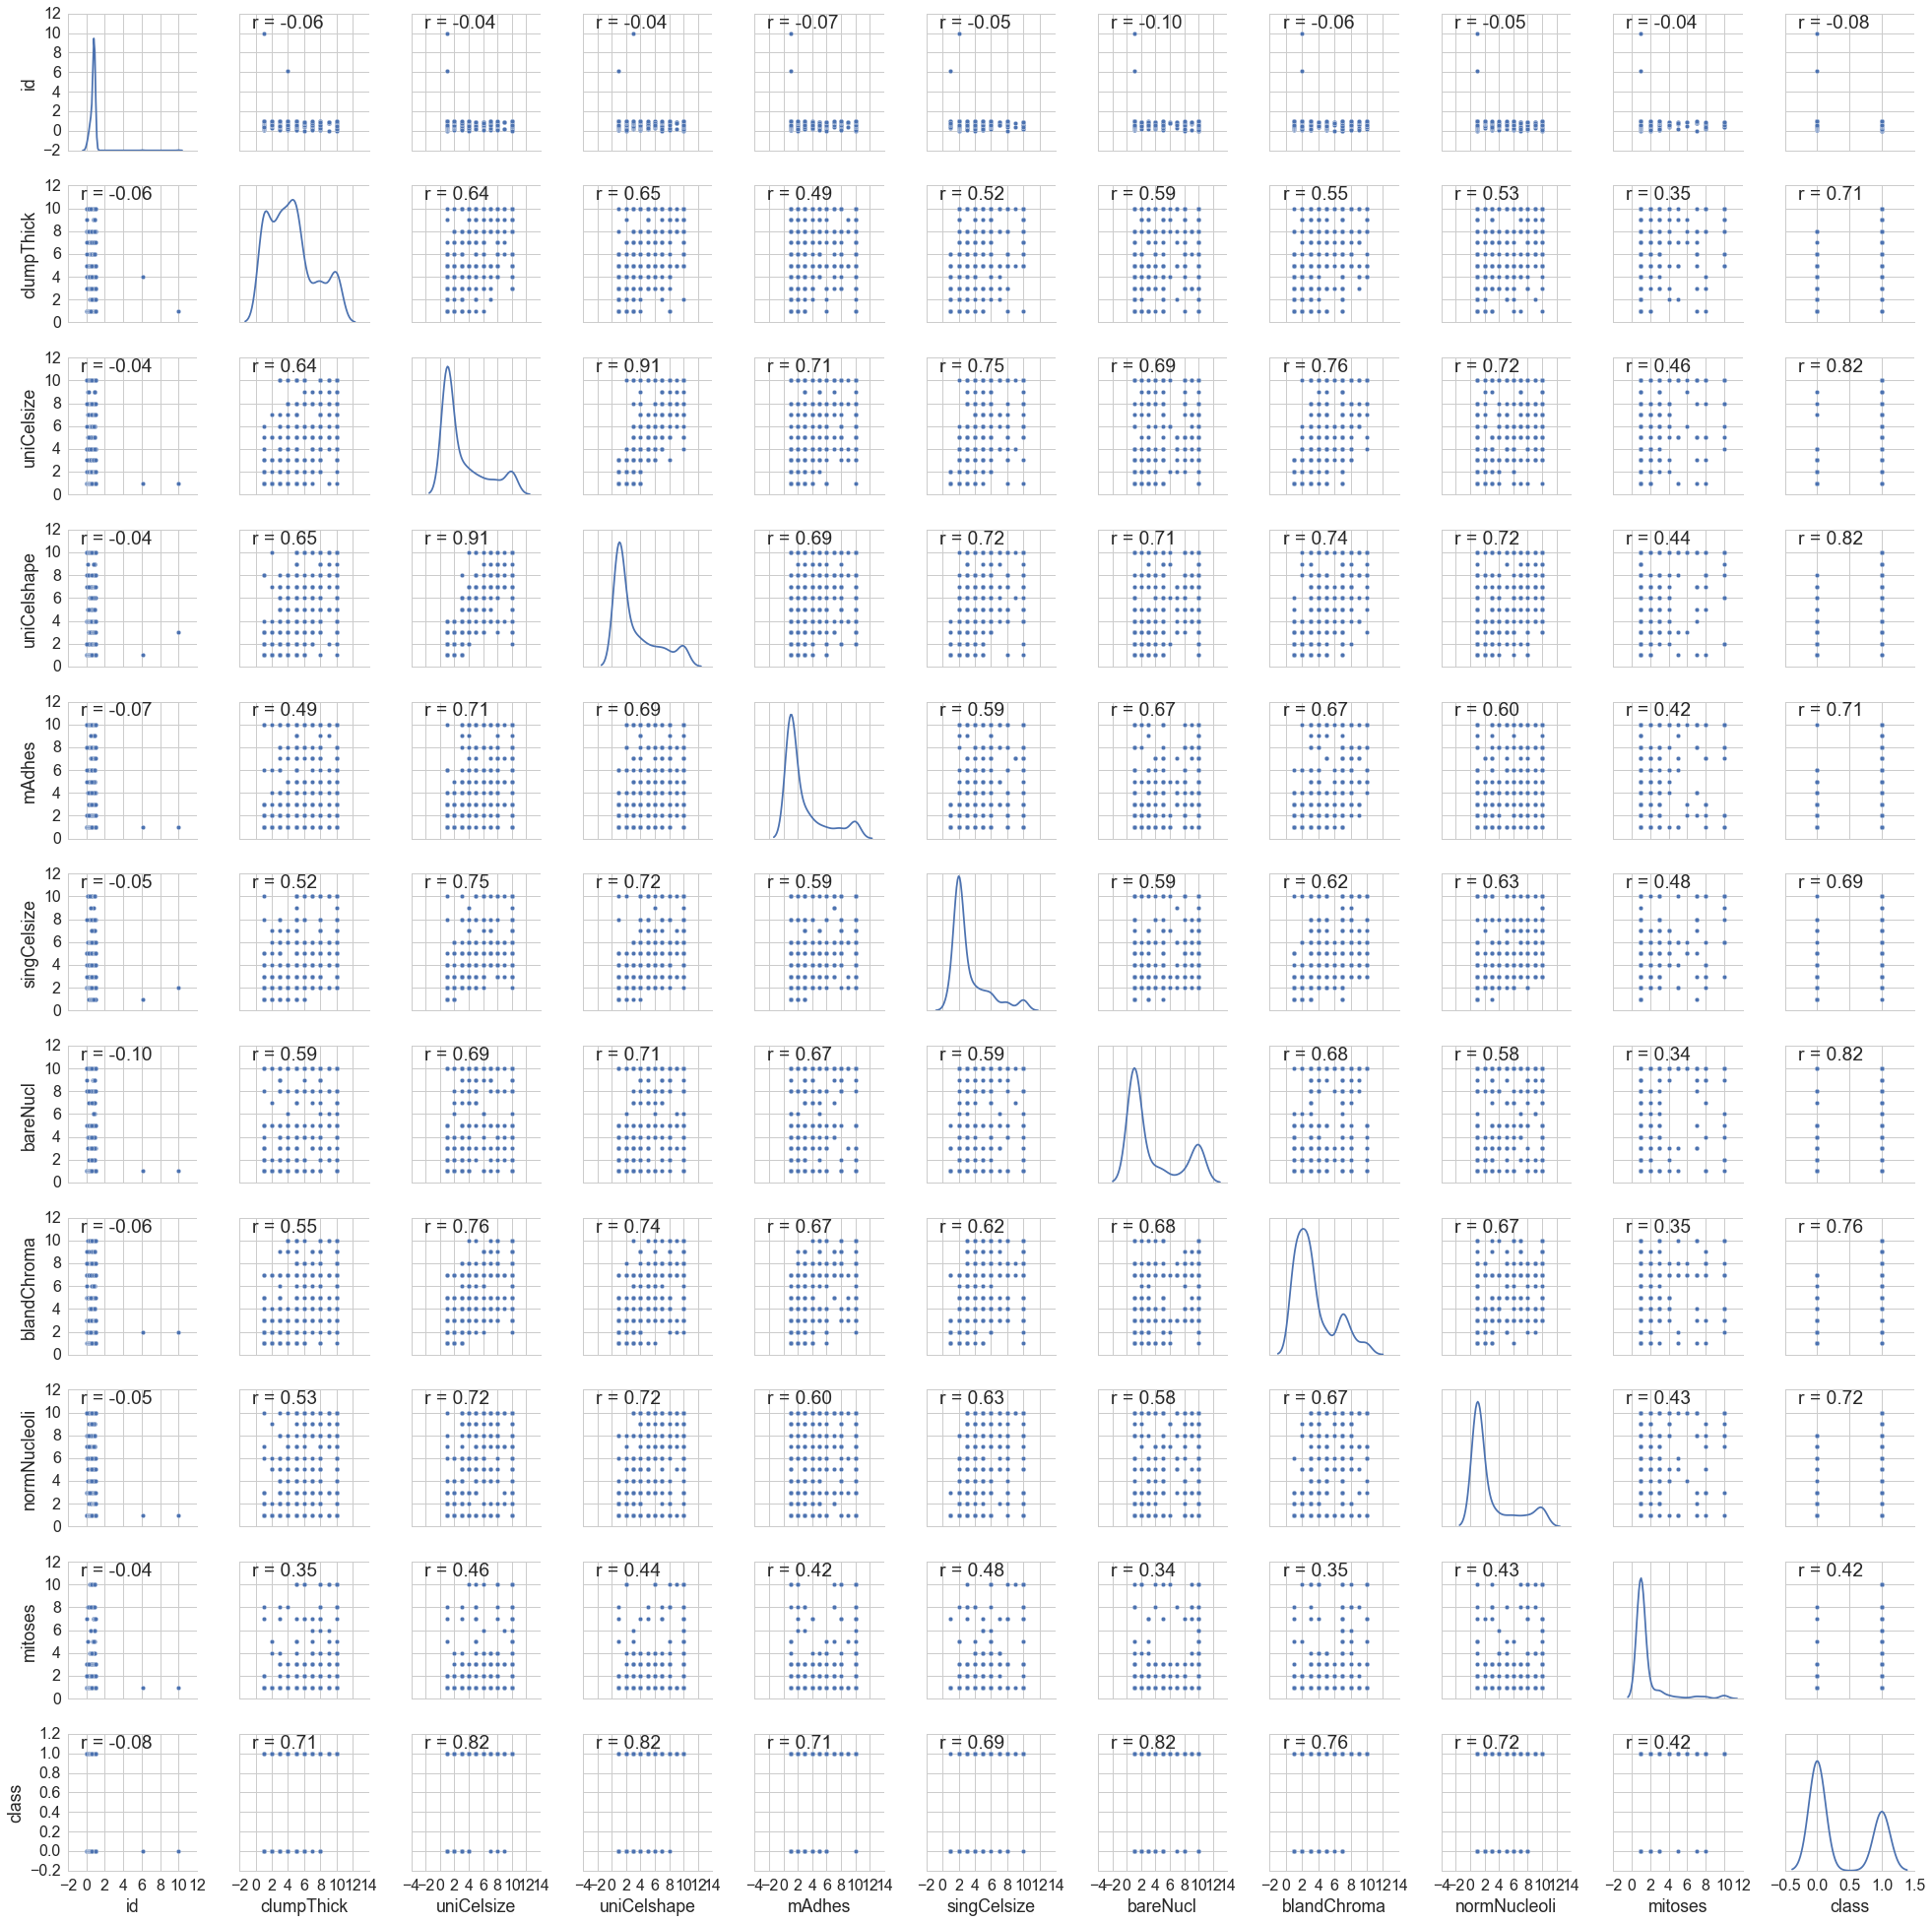

In [13]:
# plot correlation

corr = sns.pairplot(data,diag_kind='kde')

corr.map_upper(corrfunc)
corr.map_lower(corrfunc)

# the pearson corr gives the strength of the corr between -1 and 1 looking at the 'class' row you can see
#uniCelsize and uniCelshape are stongly corr with class, but are also strongly corr with each other.  bareNucl
#is also stongly corr with class.

In [14]:
# drop separate the labels and data and drop id
y_data = data['class']
x_data = data.drop(['id','class'],1)

In [15]:
# separate to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

# train with 70% of the data and leave 30% for validation

In [16]:
# Try log regression
from sklearn.linear_model import LogisticRegression

# Create regression object
model = LogisticRegression(class_weight='balanced') # balanced for biased class counts
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [17]:
#
# measure performance
from sklearn.metrics import accuracy_score, classification_report

# make predictions for test data
y_pred = model.predict(x_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, y_pred))

# log regression preforms well

Accuracy: 95.99%
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       174
          1       0.97      0.92      0.94       100

avg / total       0.96      0.96      0.96       274



In [23]:
# run cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_test, y_test, cv=5)
print("Accuracy: %0.4f%%(+/- %0.4f)" % (scores.mean()*100, scores.std() * 2 * 100))

# cross validation is consistant with the trained results

Accuracy: 97.0909%(+/- 4.9326)


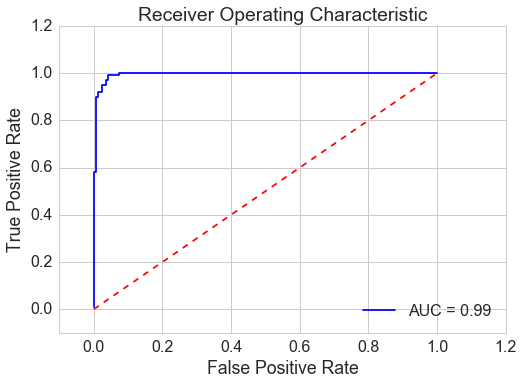

In [19]:
# check ROC 
from sklearn.metrics import roc_curve, auc
y_prob = model.predict_proba(x_test)
y_prob = y_prob[:,1]
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fp_rate, tp_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(fp_rate, tp_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()